In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pickle

In [7]:
runs = glob.glob("runs/evolution_*")+glob.glob("runs/cee_*")

In [8]:
runs

['runs/evolution_cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_evo_mode_best',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_cull_mode_best',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_cull_mode_random',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_cull_mode_age']

In [9]:
results = {}
for r in runs:
    results[r] = {}
    seeds = glob.glob("{}/*".format(r))
    for seed in seeds:
        s = int(seed.split('/')[-1])
        results[r][s] = {}
        saved_metrics = glob.glob("{}/metrics*.p".format(seed))
        for m in saved_metrics:
            iteration = int(m.split("_")[-1].split(".")[0])
            p=pickle.load(open(m, 'rb'))
            results[r][s][iteration] = p

In [59]:
def get_run_name(run):
    if "evolution" in run:
        return "evolution"
    else:
        return "cee_"+run.split("_")[-1]


def plot_metric(results, metrics=["avg_convergence"], ylabel=None, show_error=True):
    
    ci = 'sd' if show_error else None
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    
    run_names = []
    metric_names = []
    iterations = []
    values = []
    
    for m in metrics:
        for r in runs:
            run_name = get_run_name(r)
            for s in list(results[r].keys()):    
                for iteration_number in sorted(list(results[r][s].keys())):
                    if iteration_number == 0:
                        continue
                    iterations.append(iteration_number)
                    values.append(results[r][s][iteration_number][m])
                    run_names.append(run_name)
                    metric_names.append(m)
            
    values = np.array(values)
    iterations = np.array(iterations)        
    if len(metrics) < 2:     
        d = {'Number of Iterations': iterations, m: values, 'run_name': run_names, 'metric_name': metric_names}
        ax = sns.lineplot(ax=ax, x='Number of Iterations', y=m, data=pd.DataFrame(data=d), style='run_name', hue='run_name', ci=ci)
        if ylabel is None:
            ylabel = m
    else:
        d = {'Number of Iterations': iterations, 'val': values, 'run_name': run_names, 'metric_name': metric_names}
        ax = sns.lineplot(ax=ax, x='Number of Iterations', y='val', data=pd.DataFrame(data=d), style="metric_name", hue="run_name", ci=ci)
        if ylabel is None:
            ylabel = "val"
        
    ax.set(xlabel='Number of Iterations', ylabel=ylabel)
    plt.show()

In [55]:
list(results[runs[0]][42][5000].keys())

['loss',
 'acc',
 'entropy',
 'l_entropy',
 'rsa_sr',
 'rsa_si',
 'rsa_ri',
 'rsa_sm',
 'pseudo_tre',
 'topological_similarity',
 'num_unique_messages',
 'kl_divergence',
 'jaccard_similarity',
 'avg_message_dist',
 'avg_matches',
 'avg_age',
 'avg_convergence',
 'avg_convergence_at_10',
 'avg_convergence_at_100']

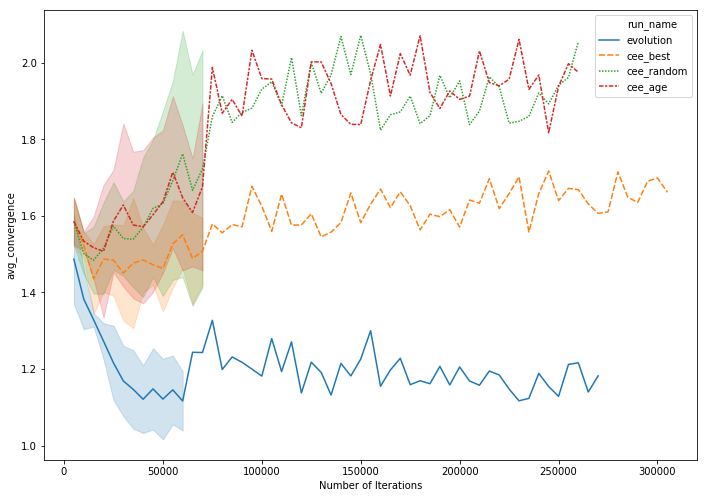

In [58]:
plot_metric(results, metrics=['avg_convergence'])

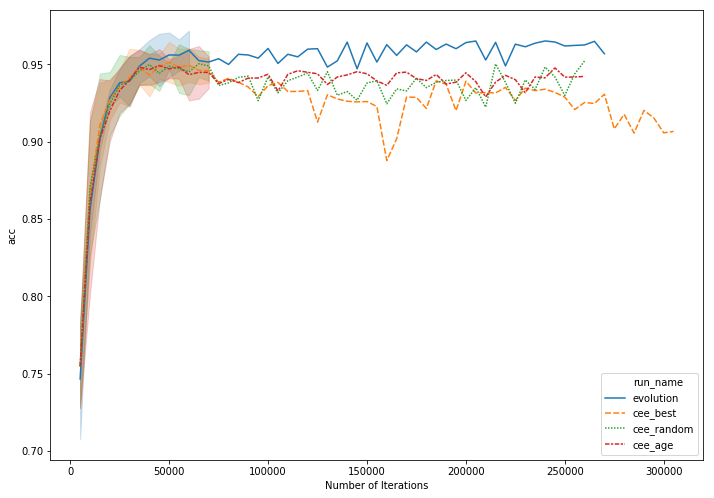

In [60]:
plot_metric(results, metrics=["acc"])

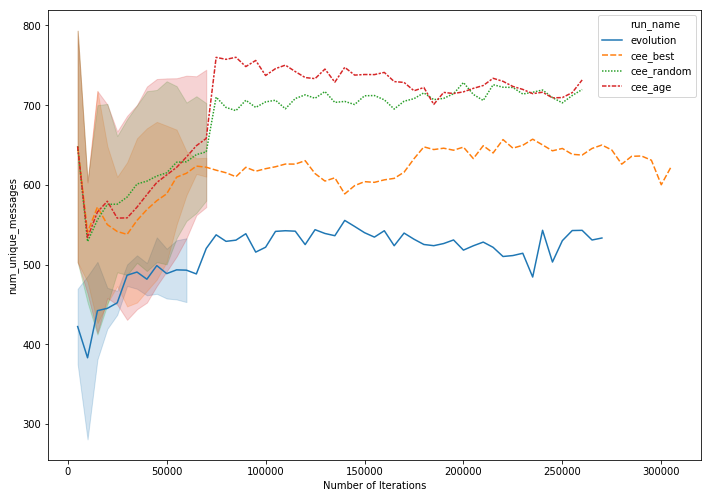

In [62]:
plot_metric(results, metrics=["num_unique_messages"])

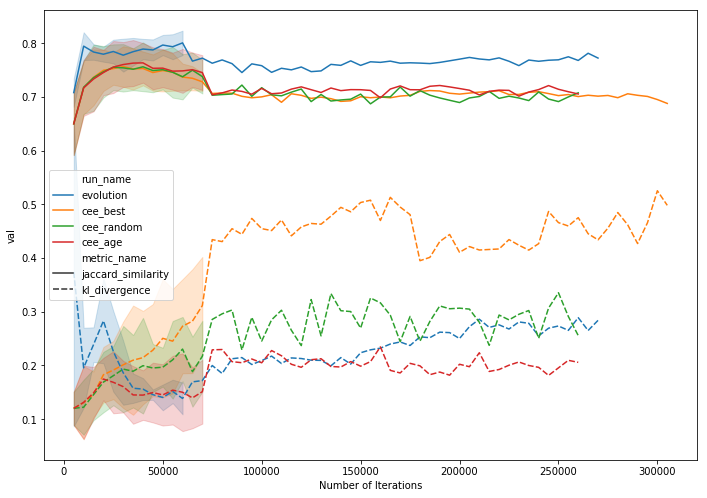

In [64]:
plot_metric(results, metrics=["jaccard_similarity", 'kl_divergence'])

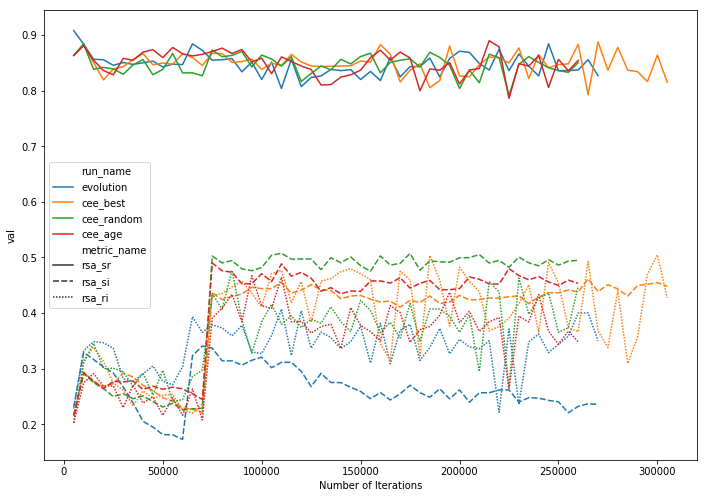

In [66]:
plot_metric(results, metrics=["rsa_sr", 'rsa_si', 'rsa_ri'], show_error=False)

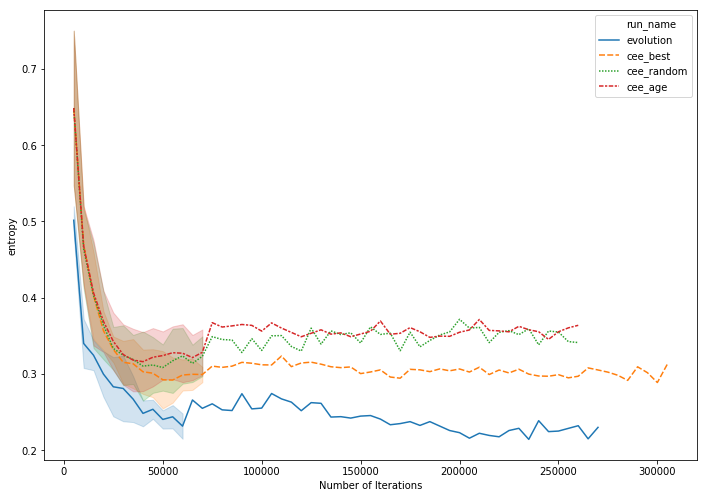

In [67]:
plot_metric(results, metrics=["entropy"])